In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Getting the data 📡

In [3]:
data=pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

# Viewing the data 👁

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.shape

(2938, 22)

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Preprocessing the data 🎈

In [7]:
col_list=[]
for col in data.columns:
    col=col.replace(" ", "")
    col_list.append(col)
data.columns=col_list

In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [10]:
for col in data.columns:
    print(col,data[col].unique(), sep="\n")
    print("*"*90)

Country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Repub

In [11]:
for col in data.columns:
    print(data[col].value_counts())
    print("*"*90)

Country
Zimbabwe                16
Turkmenistan            16
Uganda                  16
Ukraine                 16
United Arab Emirates    16
                        ..
Marshall Islands         1
Monaco                   1
Dominica                 1
Cook Islands             1
Tuvalu                   1
Name: count, Length: 193, dtype: int64
******************************************************************************************
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
******************************************************************************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************************************************************************
Lifeexpectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
49.0    

# Exploratory Data Analysis 💻

## Univariate Analysis

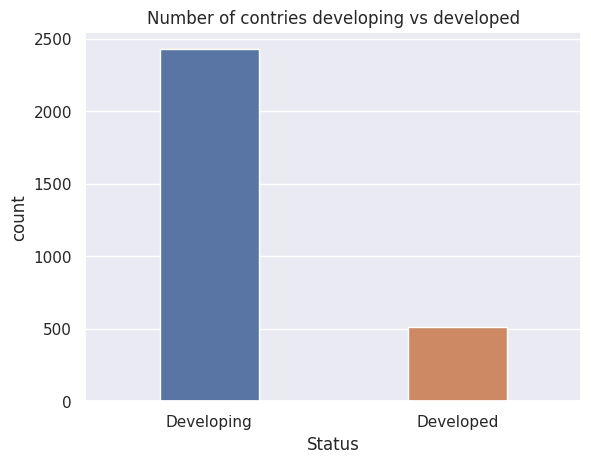

In [12]:
sns.countplot(x=data["Status"], width=0.4)
plt.title("Number of contries developing vs developed")
plt.show()

## Bivariate Analysis

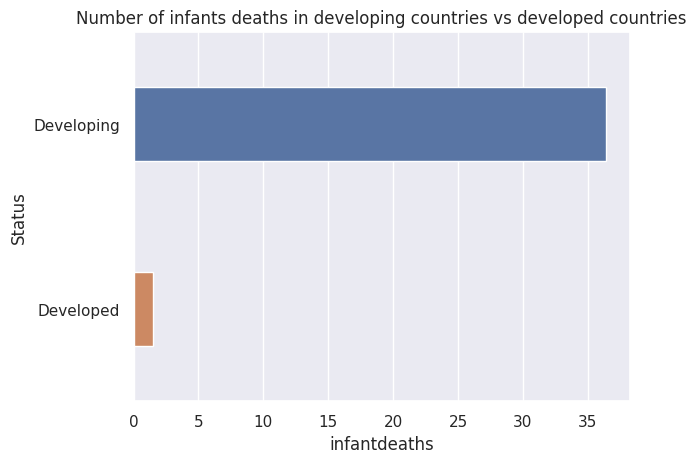

In [13]:
sns.barplot(x=data["infantdeaths"], y=data["Status"], width=0.4,ci=None)
plt.title("Number of infants deaths in developing countries vs developed countries")
plt.show()

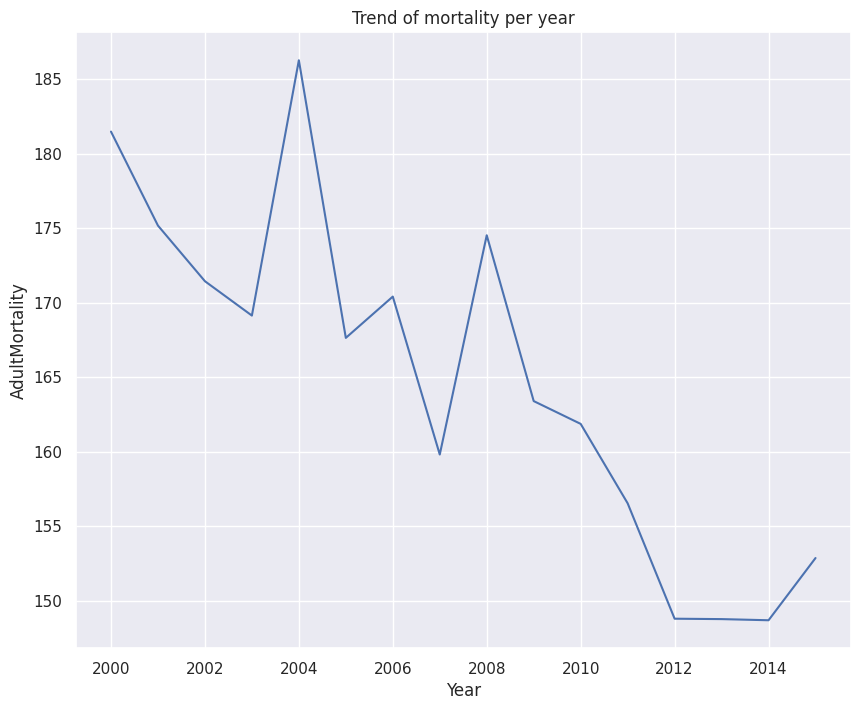

In [14]:
plt.figure(figsize=(10,8))
sns.lineplot(x=data["Year"], y=data["AdultMortality"],ci=None)
plt.title("Trend of mortality per year")
plt.show()

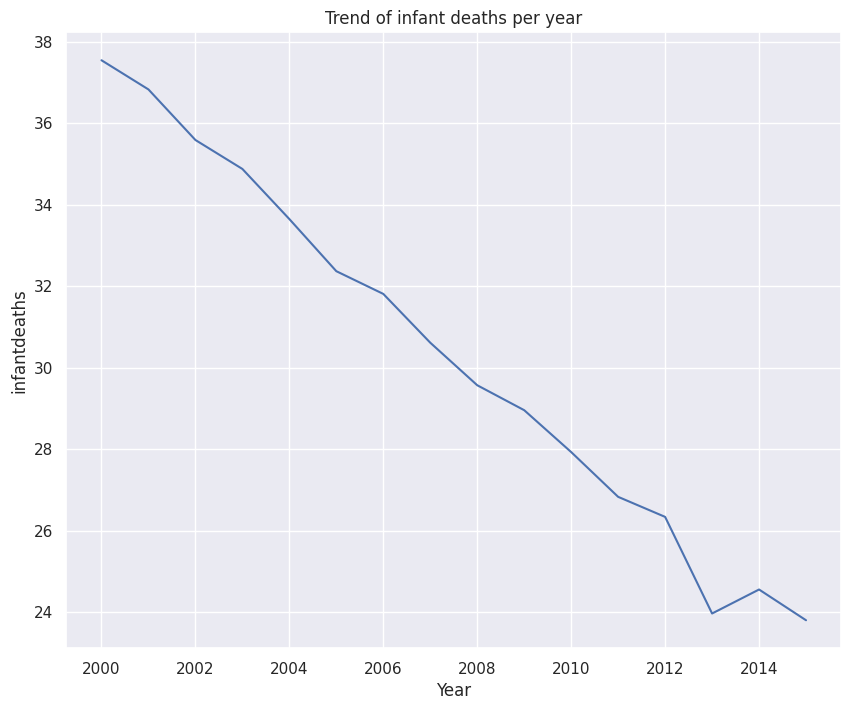

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(x=data["Year"], y=data["infantdeaths"],ci=None)
plt.title("Trend of infant deaths per year")
plt.show()

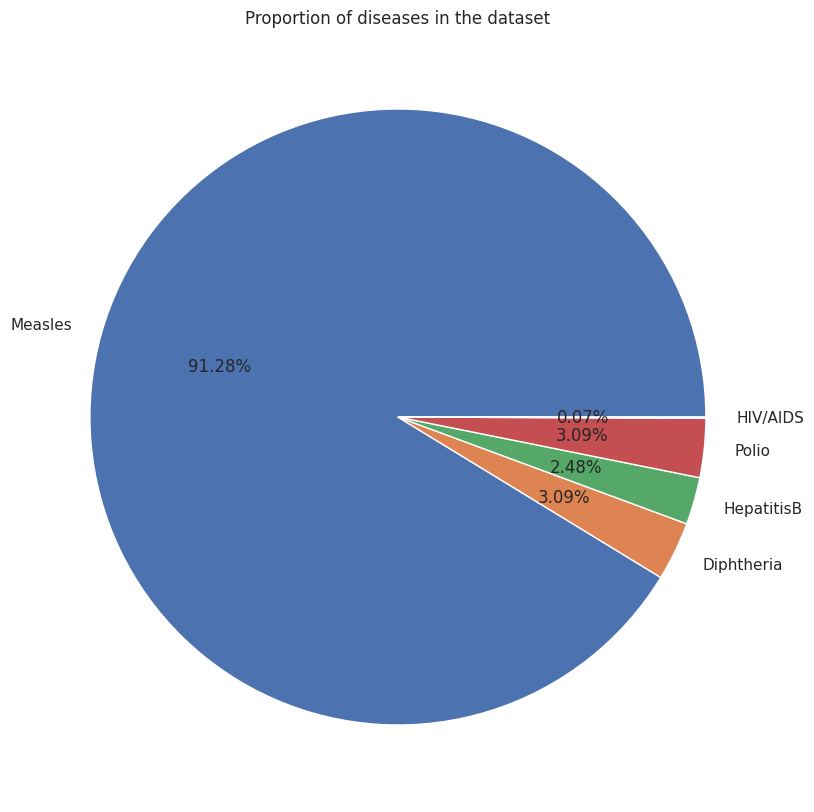

In [16]:
plt.figure(figsize=(15,10))
values_list=[data["Measles"].sum(),data["Diphtheria"].sum(), data["HepatitisB"].sum(), data["Polio"].sum(), data["HIV/AIDS"].sum()]
plt.pie(values_list, labels=["Measles", "Diphtheria", "HepatitisB", "Polio", "HIV/AIDS"], autopct="%.2f%%")
plt.title("Proportion of diseases in the dataset")
plt.show()

In [17]:
print(data["Measles"].sum())
print(data["Diphtheria"].sum())
print(data["HepatitisB"].sum())
print(data["Polio"].sum())
print(data["HIV/AIDS"].sum())

7108762
240304.0
193043.0
240964.0
5118.3


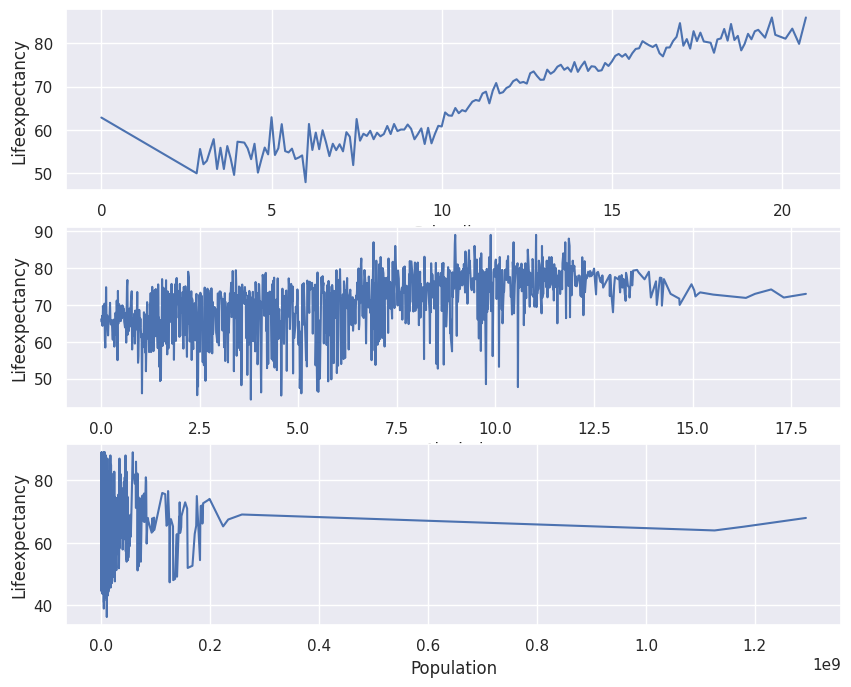

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
sns.lineplot(x=data["Schooling"], y=data["Lifeexpectancy"], ci=None)
plt.subplot(3,1,2)
sns.lineplot(x=data["Alcohol"], y=data["Lifeexpectancy"], ci=None)
plt.subplot(3,1,3)
sns.lineplot(x=data["Population"], y=data["Lifeexpectancy"], ci=None)
plt.show()

In [19]:
import plotly.express as px
fig = px.line(data, x = 'Year', y = ["Measles", "Diphtheria", "HepatitisB", "Polio", "HIV/AIDS", "Lifeexpectancy"],
              animation_frame="Country",
              template = 'plotly_dark',
              width=1000, height=600)
fig.update_layout(title="Country wise year wise number of occurences of diseases")

fig.show()

# Dropping unnecessary columns ❌

In [20]:
data.drop("Country", axis=1, inplace=True)

# Label encoding 🕛

In [21]:
data["Status"]=data["Status"].map({"Developing":0, "Developed":1})

In [22]:
data.head()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Feature Scaling 💡

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data.iloc[:,2:]=scaler.fit_transform(data.iloc[:,2:])

In [24]:
data.head()

,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,0,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,-0.959116,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,2014,0,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,-0.984066,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,2013,0,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,-1.009015,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,2012,0,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,-1.033964,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,2011,0,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,-1.053924,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


# Checking the correlation of the columns of the data 🏹

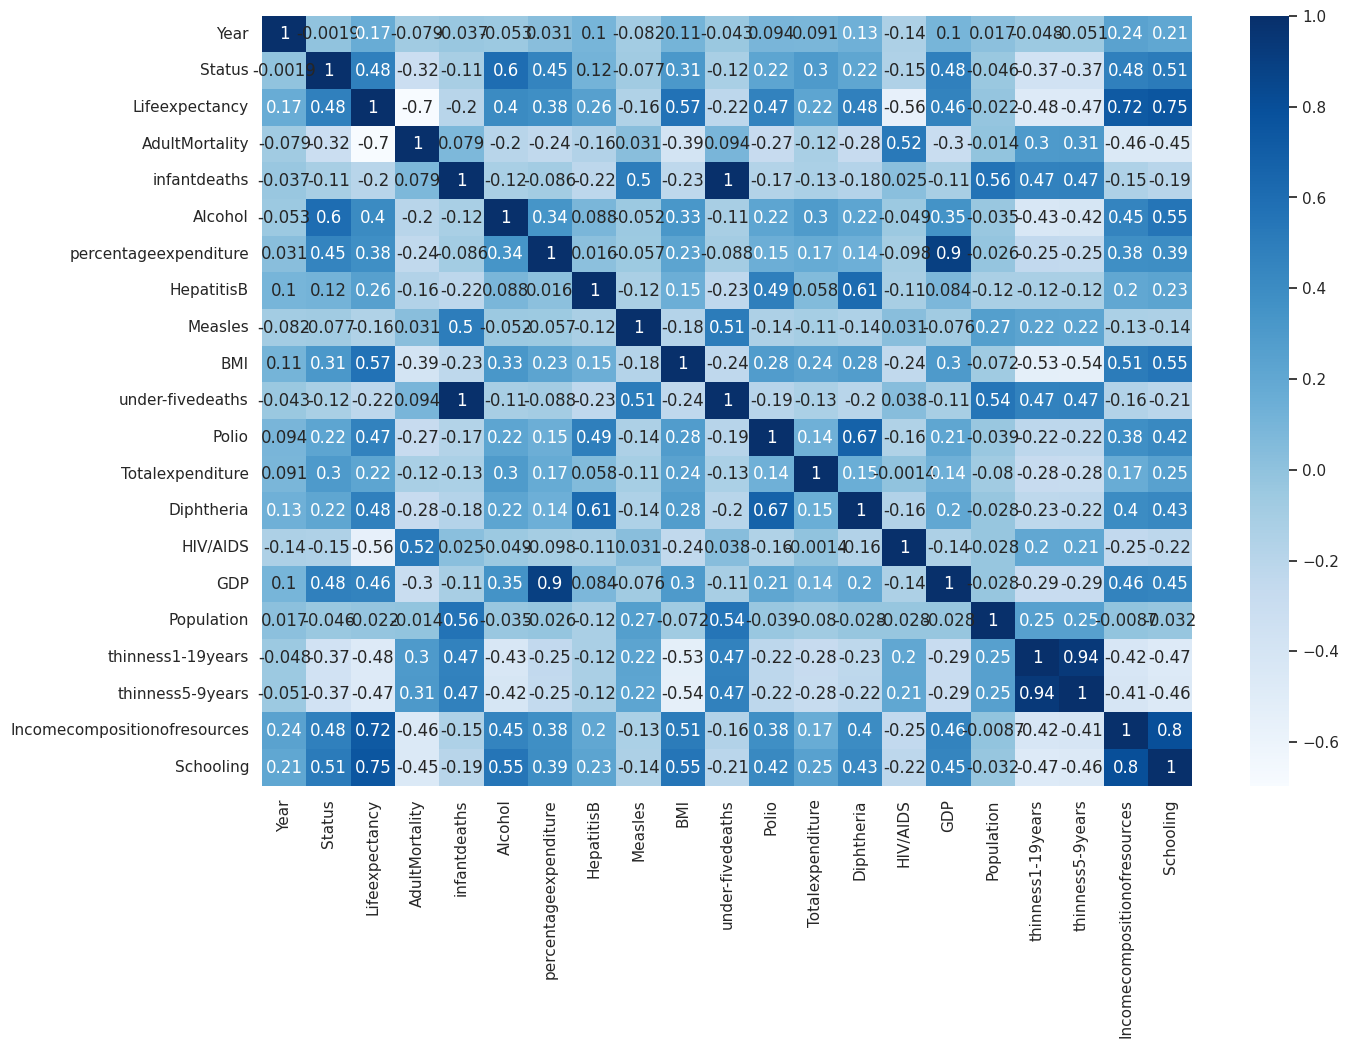

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.show()

In [26]:
#[Life Expectancy, Incomecompositionofresources], [Lifeexpectancy, SChooling], [Income_of resources, SChooling], [thinness1-19years, thinness5-9years], [percentageexpenditure, GDP], [under_five_deaths, infantdeaths]

In [27]:
y=data["Lifeexpectancy"]
data.drop("Lifeexpectancy", axis=1,inplace=True)
x=data

# Train Test split 🔧

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2, random_state=42)

# Fixing null values 🪚

In [29]:
xtrain.isna().sum()

Year                              0
Status                            0
AdultMortality                    8
infantdeaths                      0
Alcohol                         158
percentageexpenditure             0
HepatitisB                      439
Measles                           0
BMI                              27
under-fivedeaths                  0
Polio                            14
Totalexpenditure                185
Diphtheria                       14
HIV/AIDS                          0
GDP                             345
Population                      516
thinness1-19years                27
thinness5-9years                 27
Incomecompositionofresources    131
Schooling                       129
dtype: int64

In [30]:
from sklearn.impute import KNNImputer

imp=KNNImputer()
imp.fit(xtrain)
df=imp.transform(xtrain)
xtrain=pd.DataFrame(df, columns=xtrain.columns)

In [31]:
xtrain.isna().sum()

Year                            0
Status                          0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [32]:
ytrain.isna().sum()

8

In [33]:
ytrain=ytrain.fillna(ytrain.median())

In [34]:
ytrain.isna().sum()

0

In [35]:
df2=imp.transform(xtest)
xtest=pd.DataFrame(df2, columns=xtest.columns)
ytest=ytest.fillna(ytest.mean())


# Feature Selection ✅

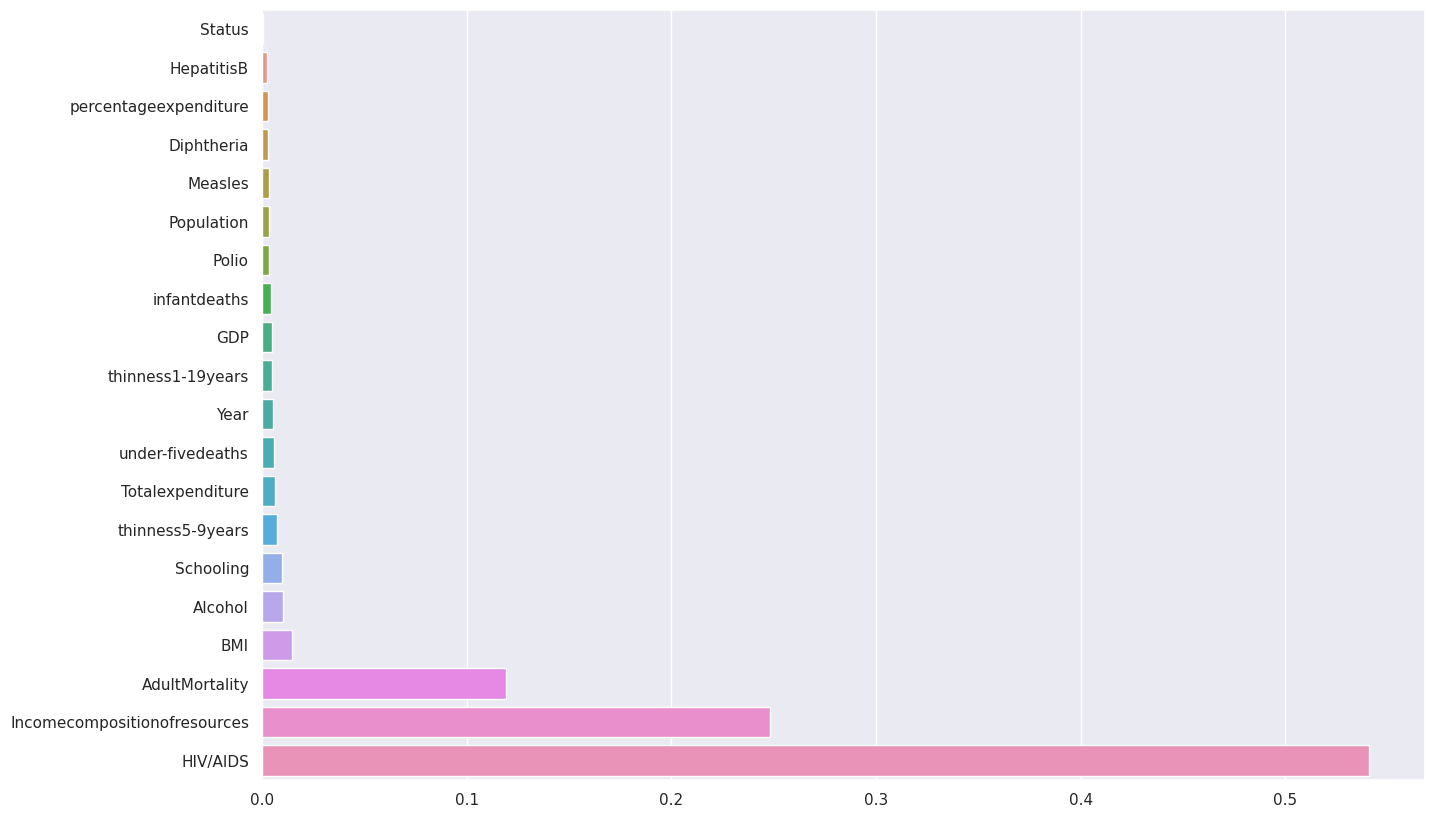

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

plt.figure(figsize=(15,10))
sorted_index=rf.feature_importances_.argsort()
sns.barplot(y=x.columns[sorted_index], x=rf.feature_importances_[sorted_index])
plt.show()

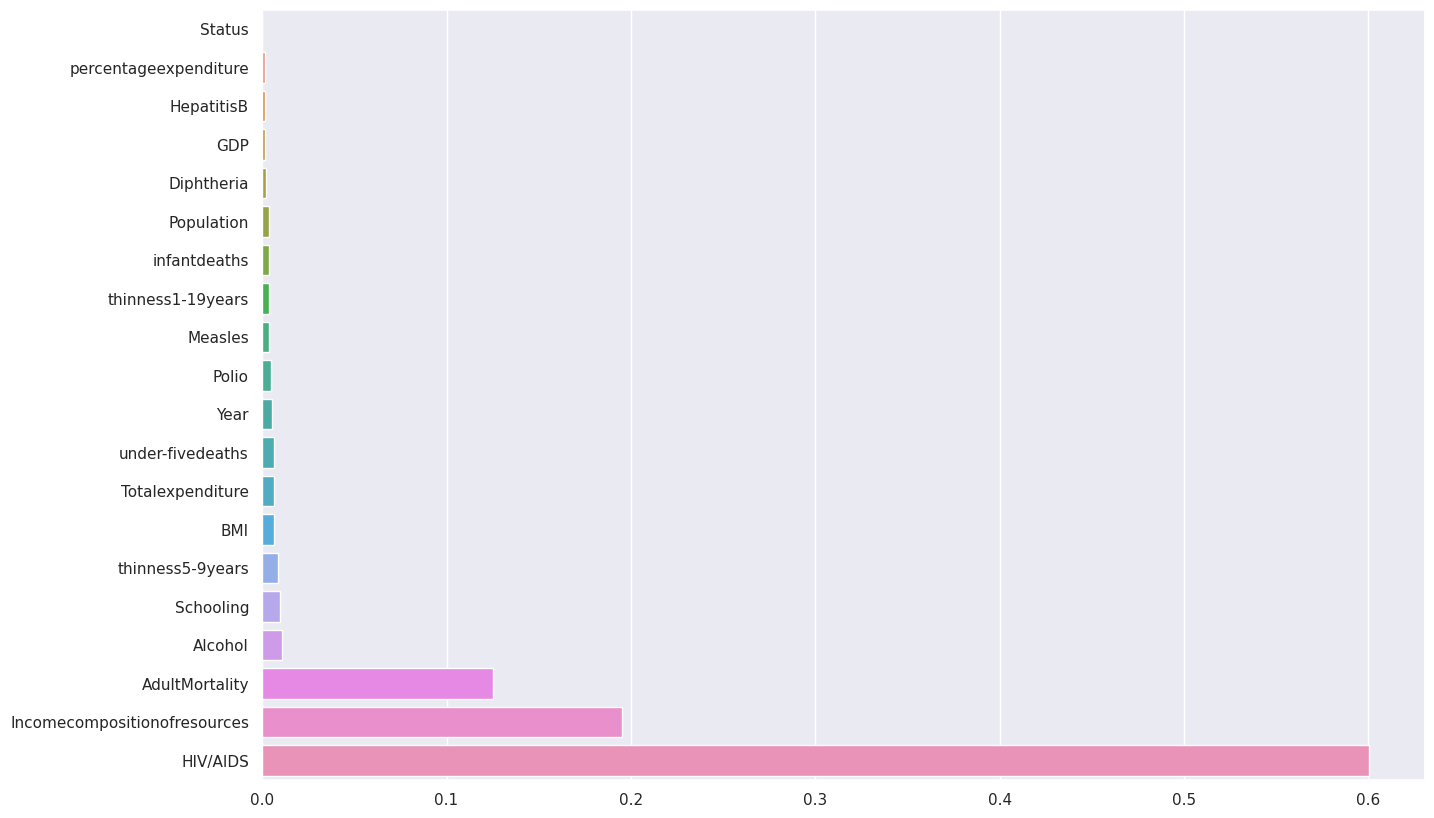

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

plt.figure(figsize=(15,10))
sorted_index=dt.feature_importances_.argsort()
sns.barplot(y=x.columns[sorted_index], x=dt.feature_importances_[sorted_index])
plt.show()

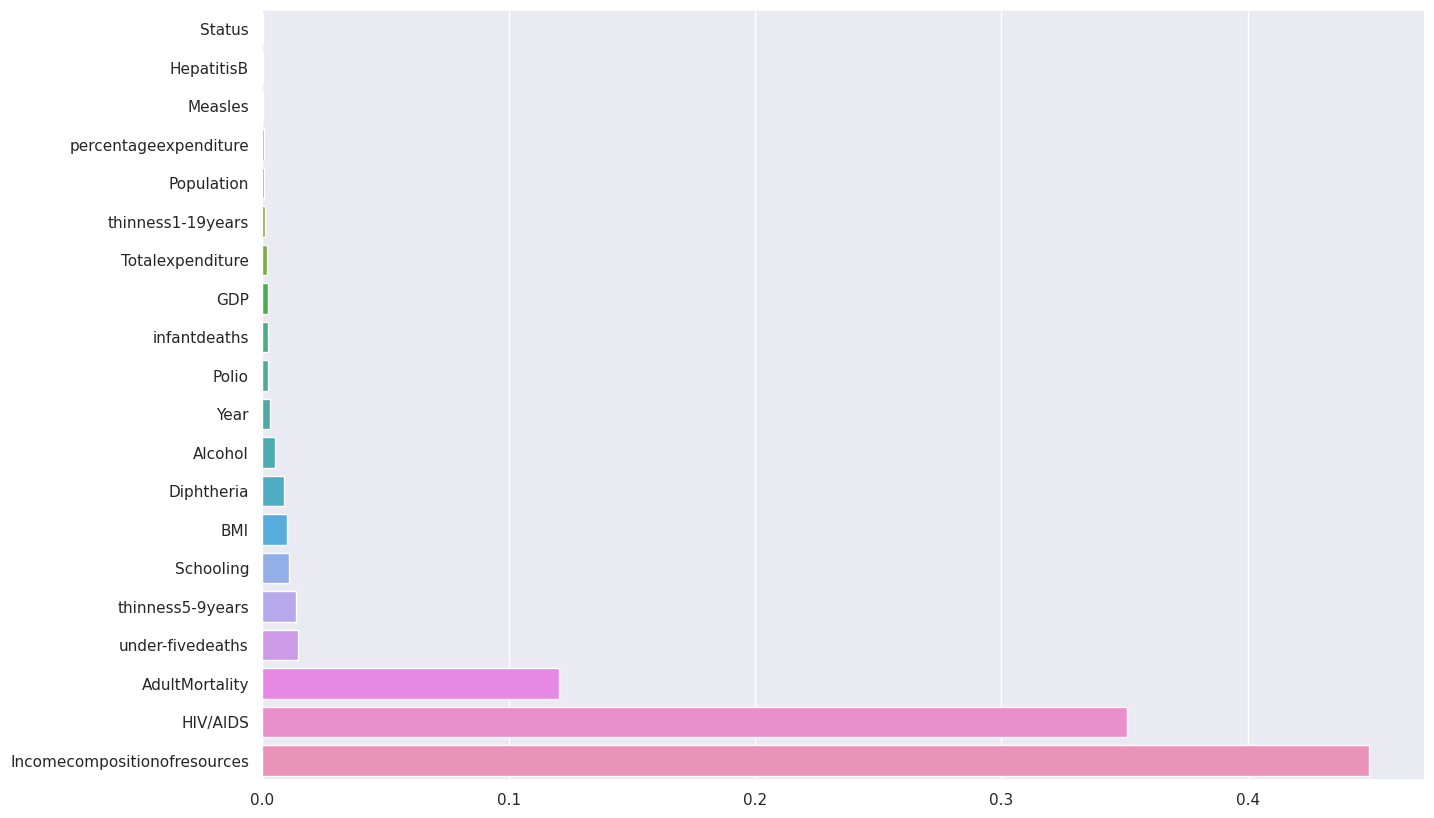

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()
gb.fit(xtrain, ytrain)

plt.figure(figsize=(15,10))
sorted_index=gb.feature_importances_.argsort()
sns.barplot(y=x.columns[sorted_index], x=gb.feature_importances_[sorted_index])
plt.show()

In [39]:
xtrain.drop(["Schooling", "thinness1-19years", "percentageexpenditure","infantdeaths", "Status", "Population"], axis=1, inplace=True)

In [40]:
xtest.drop(["Schooling", "thinness1-19years", "percentageexpenditure","infantdeaths", "Status", "Population"], axis=1, inplace=True)

# Building Models 🔧

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
def build_model(model_name):
    mn=model_name()
    mn.fit(xtrain, ytrain)
    train_pred=mn.predict(xtrain)
    test_pred=mn.predict(xtest)
    return(train_pred, test_pred)

In [43]:
model_names=["DecisionTreeRegressor", "RandomForestRegressor", "XGBRegressor","CatBoostRegressor"]
train_r2_score=[]
test_r2_score=[]

## DecisionTreeRegressor

In [44]:
train_pred, test_pred=build_model(DecisionTreeRegressor)

print("R2 score of train data:", r2_score(ytrain, train_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytrain, train_pred), sep="\n")
print("R2 score of test data:", r2_score(ytest, test_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytest, test_pred), sep="\n")

train_r2_score.append(r2_score(ytrain, train_pred))
test_r2_score.append(r2_score(ytest, test_pred))

R2 score of train data:
1.0
Mean squared error of train data:
3.933814354493077e-36
R2 score of test data:
0.9056533541260898
Mean squared error of train data:
0.09014510613390478


## RandomForestRegressor

In [45]:
train_pred, test_pred=build_model(RandomForestRegressor)

print("R2 score of train data:", r2_score(ytrain, train_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytrain, train_pred), sep="\n")
print("R2 score of test data:", r2_score(ytest, test_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytest, test_pred), sep="\n")

train_r2_score.append(r2_score(ytrain, train_pred))
test_r2_score.append(r2_score(ytest, test_pred))

R2 score of train data:
0.994157217165404
Mean squared error of train data:
0.005884016950352951
R2 score of test data:
0.9627909055967255
Mean squared error of train data:
0.03555206158163181


## XGBRegressor

In [46]:
train_pred, test_pred=build_model(XGBRegressor)

print("R2 score of train data:", r2_score(ytrain, train_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytrain, train_pred), sep="\n")
print("R2 score of test data:", r2_score(ytest, test_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytest, test_pred), sep="\n")

train_r2_score.append(r2_score(ytrain, train_pred))
test_r2_score.append(r2_score(ytest, test_pred))


R2 score of train data:
0.9991997953515495
Mean squared error of train data:
0.0008058519114136284
R2 score of test data:
0.9652022505301904
Mean squared error of train data:
0.03324810108638375


## CatBoostRegressor

In [47]:
train_pred, test_pred=build_model(CatBoostRegressor)

print("R2 score of train data:", r2_score(ytrain, train_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytrain, train_pred), sep="\n")
print("R2 score of test data:", r2_score(ytest, test_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytest, test_pred), sep="\n")

train_r2_score.append(r2_score(ytrain, train_pred))
test_r2_score.append(r2_score(ytest, test_pred))

Learning rate set to 0.046861
0:	learn: 0.9666062	total: 56ms	remaining: 55.9s
1:	learn: 0.9351541	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9017914	total: 59.7ms	remaining: 19.8s
3:	learn: 0.8709203	total: 61.7ms	remaining: 15.4s
4:	learn: 0.8407220	total: 63.7ms	remaining: 12.7s
5:	learn: 0.8123249	total: 65.8ms	remaining: 10.9s
6:	learn: 0.7833640	total: 67.9ms	remaining: 9.63s
7:	learn: 0.7565778	total: 69.8ms	remaining: 8.65s
8:	learn: 0.7318693	total: 71.9ms	remaining: 7.92s
9:	learn: 0.7092004	total: 73.9ms	remaining: 7.32s
10:	learn: 0.6858008	total: 75.9ms	remaining: 6.83s
11:	learn: 0.6650964	total: 78ms	remaining: 6.42s
12:	learn: 0.6443046	total: 80ms	remaining: 6.07s
13:	learn: 0.6257531	total: 81.9ms	remaining: 5.77s
14:	learn: 0.6076205	total: 84ms	remaining: 5.52s
15:	learn: 0.5880668	total: 86.1ms	remaining: 5.29s
16:	learn: 0.5702774	total: 88.1ms	remaining: 5.09s
17:	learn: 0.5544989	total: 90ms	remaining: 4.91s
18:	learn: 0.5388363	total: 92.2ms	remaining: 4.76s
19

In [48]:
model_names

['DecisionTreeRegressor',
 'RandomForestRegressor',
 'XGBRegressor',
 'CatBoostRegressor']

In [49]:
train_r2_score

[1.0, 0.994157217165404, 0.9991997953515495, 0.992118504685198]

In [50]:
test_r2_score

[0.9056533541260898,
 0.9627909055967255,
 0.9652022505301904,
 0.9661561553217459]

In [51]:
table=pd.DataFrame()
table["Model_name"]=model_names
table["Train_R2_score"]=train_r2_score
table["Test_R2_score"]=test_r2_score
table

,Model_name,Train_R2_score,Test_R2_score
0,DecisionTreeRegressor,1.000000,0.905653
1,RandomForestRegressor,0.994157,0.962791
2,XGBRegressor,0.999200,0.965202
3,CatBoostRegressor,0.992119,0.966156


## XGBRegressor is the best model.

In [52]:
xgb=XGBRegressor()
xgb.fit(xtrain, ytrain)
train_pred=xgb.predict(xtrain)
test_pred=xgb.predict(xtest)
print("R2 score of train data:", r2_score(ytrain, train_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytrain, train_pred), sep="\n")
print("R2 score of test data:", r2_score(ytest, test_pred), sep="\n")
print("Mean squared error of train data:", mean_squared_error(ytest, test_pred), sep="\n")


R2 score of train data:
0.9991997953515495
Mean squared error of train data:
0.0008058519114136284
R2 score of test data:
0.9652022505301904
Mean squared error of train data:
0.03324810108638375


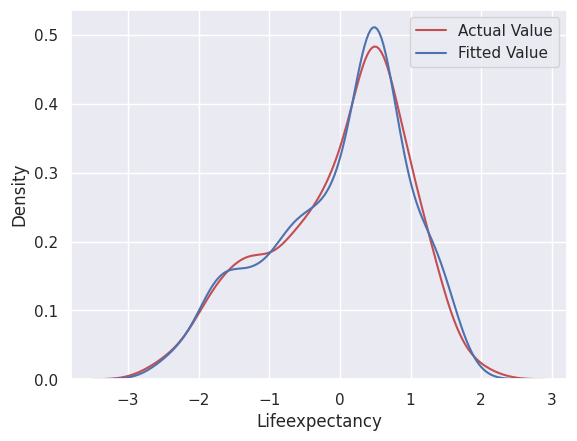

In [53]:
ax=sns.distplot(ytest, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred, hist=False, color="b", ax=ax, label="Fitted Value")
plt.legend(loc="best")
plt.show()

In [54]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x=ytest, y=test_pred, opacity=0.65)
fig.add_traces(go.Scatter(x=[min(ytest), max(ytest)], y=[min(ytest), max(ytest)], name='Regression Fit'))
fig.show()